# Image Classification Using CNN

## Objectives
- build image classification CNN using python on the ImageNet datasets.
- CNNs work for the image classification task
- using TensorFlow’s Keras library to demonstrate image classification using CNNs

## Dataset

There are various datasets that you can leverage for applying convolutional neural networks. Here are three popular datasets:

- MNIST
- CIFAR-10
- ImageNet

## Import Libraries

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims, argmax

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Download the Imagenette dataset

In [2]:
#!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz

In [3]:
#!tar -xf imagenette2.tgz

## Global variables

In [2]:
path = 'imagenette2/'
batch_size  = 16
input_shape = (150, 150, 3)

## 1. Preparing the Dataset

Uses techniques to generate new images from existing ones (applying random transformations: distortion, rotation, zoom, etc.) for datasets with few images. Obviously, the more images to train, the better the model.

In [3]:
# create a new generator
imagegen = ImageDataGenerator()

# load train data
train = imagegen.flow_from_directory(path + "train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
val = imagegen.flow_from_directory(path + "val/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))

classes = list(train.class_indices.keys())

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


### List of the 10 classes to classify extracted from the training set.

In [4]:
train.class_indices

{'n01440764': 0,
 'n02102040': 1,
 'n02979186': 2,
 'n03000684': 3,
 'n03028079': 4,
 'n03394916': 5,
 'n03417042': 6,
 'n03425413': 7,
 'n03445777': 8,
 'n03888257': 9}

In [22]:
imagenette_map = { 
    "n01440764" : "tench",
    "n02102040" : "springer",
    "n02979186" : "casette_player",
    "n03000684" : "chain_saw",
    "n03028079" : "church",
    "n03394916" : "French_horn",
    "n03417042" : "garbage_truck",
    "n03425413" : "gas_pump",
    "n03445777" : "golf_ball",
    "n03888257" : "parachute"
}

## 2. Building the model
The trained network (structure and weights) is recorded, so that it can be used again later.

In [41]:
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())

# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fit on data for 30 epochs
results1 = model.fit_generator(train, epochs=30, validation_data=val)

# salve model trained
model.save('cnn_model.h5')

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/30


2024-01-28 22:49:43.595589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


74/74 [==============================] - ETA: 0s - loss: 2.5156 - accuracy: 0.1765

2024-01-28 22:51:10.453941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


74/74 [==============================] - 101s 1s/step - loss: 2.5156 - accuracy: 0.1765 - val_loss: 4.2657 - val_accuracy: 0.1338
Epoch 2/30
74/74 [==============================] - 101s 1s/step - loss: 2.0583 - accuracy: 0.3003 - val_loss: 2.3874 - val_accuracy: 0.2428
Epoch 3/30
74/74 [==============================] - 101s 1s/step - loss: 1.7513 - accuracy: 0.4093 - val_loss: 2.0247 - val_accuracy: 0.3126
Epoch 4/30
74/74 [==============================] - 101s 1s/step - loss: 1.6017 - accuracy: 0.4633 - val_loss: 2.1805 - val_accuracy: 0.3304
Epoch 5/30
74/74 [==============================] - 102s 1s/step - loss: 1.3404 - accuracy: 0.5606 - val_loss: 2.1032 - val_accuracy: 0.3628
Epoch 6/30
74/74 [==============================] - 100s 1s/step - loss: 1.1066 - accuracy: 0.6245 - val_loss: 1.8618 - val_accuracy: 0.4028
Epoch 7/30
74/74 [==============================] - 100s 1s/step - loss: 0.8947 - accuracy: 0.7065 - val_loss: 1.9316 - val_accuracy: 0.3944
Epoch 8/30
74/74 [======

### Model architecture summary

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 25)      1900      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 25)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 50)        31300     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 28, 28, 50)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 50)       200       
 ormalization)                                                   
                                                      

### Printing val_loss history

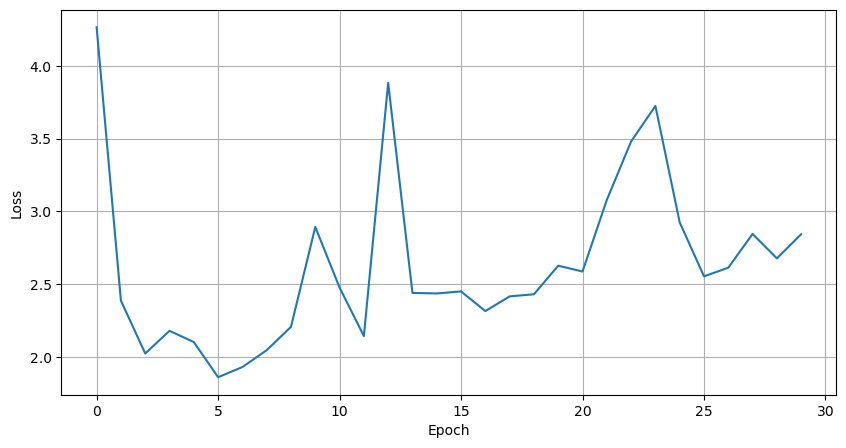

In [43]:
plt.figure(figsize=(10,5))
plt.plot(results1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('loss_cnn.png')

### Printing val_accuracy history

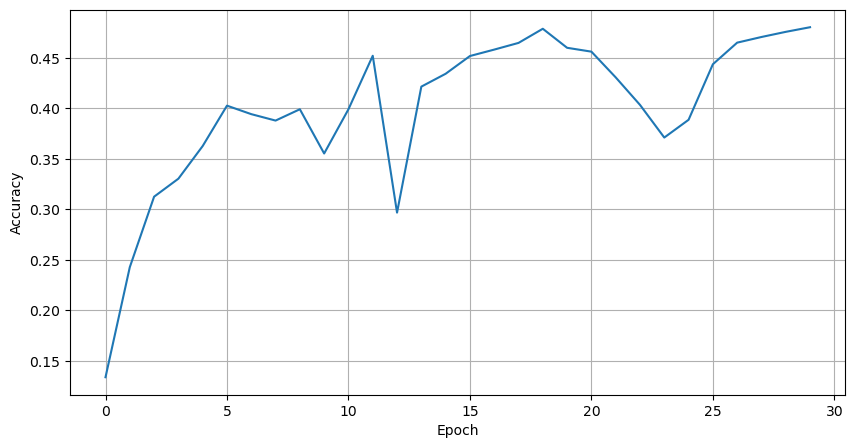

In [44]:
plt.figure(figsize=(10,5))
plt.plot(results1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('accuracy_cnn.png')

## 3. Transfer learning (VGG16) to improve accuracy

### Downloading weights of VGG16

In [45]:
from keras.applications import VGG16

# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet')

pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Generate features from VGG16

#### Extract useful features that VGG16 already knows from our dataset’s images

In [47]:
from keras.utils import to_categorical

# extract train and val features
vgg_train = pretrained_model.predict(train)
vgg_test = pretrained_model.predict(val)

2024-01-28 23:57:41.925255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


74/74 [==============================] - 626s 8s/step


2024-01-29 00:08:08.179291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 261s 8s/step


#### OHE target column

In [48]:
train_target = to_categorical(train.labels)
test_target = to_categorical(val.labels)

#### Once the above features are ready, use them for training a basic, Fully Connected Neural Network in Keras

In [49]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [50]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 100)               2508900   
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2,510,310
Trainable params: 2,510,110
Non-trainable params: 200
__________________________________________

#### Train model using features generated from VGG16 model

In [51]:
results2 = model2.fit(vgg_train, train_target, epochs=50, batch_size=128, validation_data=(vgg_test, test_target))

# salve model trained
model2.save('fcnn_vgg_model.h5')

Epoch 1/50
74/74 [==============================] - 1s 7ms/step - loss: 0.4368 - accuracy: 0.8840 - val_loss: 0.2036 - val_accuracy: 0.9343
Epoch 2/50
74/74 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.9745 - val_loss: 0.1818 - val_accuracy: 0.9442
Epoch 3/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0642 - accuracy: 0.9920 - val_loss: 0.1745 - val_accuracy: 0.9478
Epoch 4/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9960 - val_loss: 0.1740 - val_accuracy: 0.9439
Epoch 5/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9987 - val_loss: 0.1708 - val_accuracy: 0.9452
Epoch 6/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9988 - val_loss: 0.1762 - val_accuracy: 0.9427
Epoch 7/50
74/74 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9990 - val_loss: 0.1747 - val_accuracy: 0.9445
Epoch 8/50
74/74 [==

### Printing val_loss history

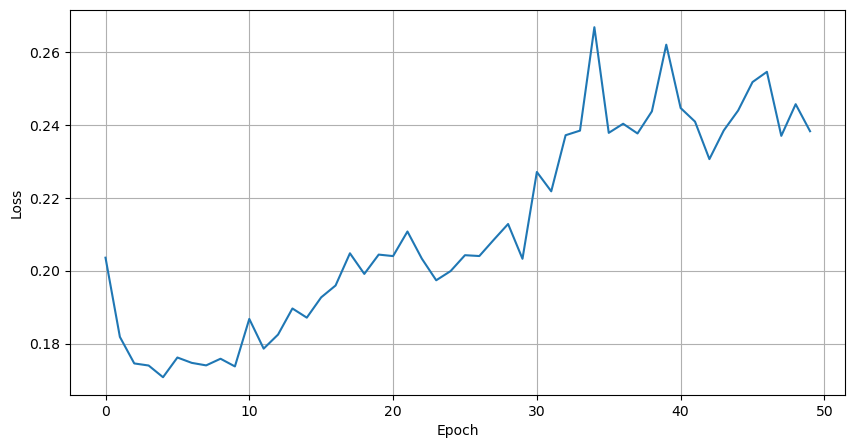

In [52]:
plt.figure(figsize=(10,5))
plt.plot(results2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('loss_fcnn_vgg.png')

### Printing val_accuracy history

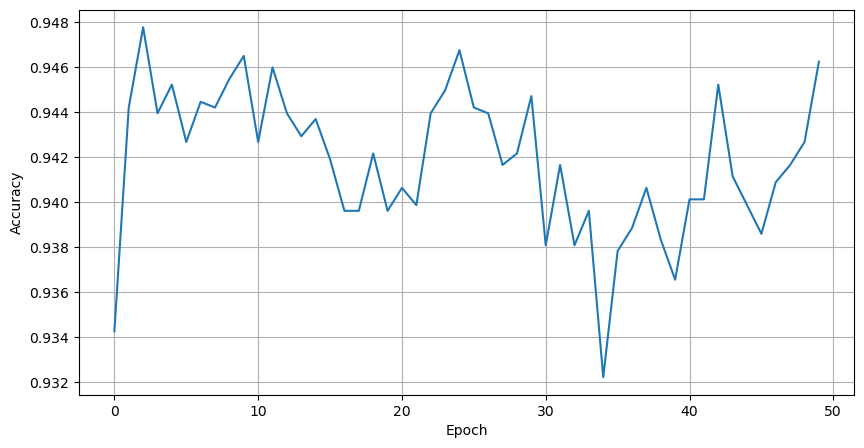

In [53]:
plt.figure(figsize=(10,5))
plt.plot(results2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('accuracy_fcnn_vgg.png')

## 4. Load a previously trained network and ask it to identify the images.

In [25]:
import keras.utils as image
import numpy as np

cnn = load_model('fcnn_vgg_model.h5')
#cnn = load_model('cnn_model1.h5')

for i in range(0, 6):
    file = 'images/unknown-' + str(i) + '.JPEG'
    img = image.load_img(file, target_size = (224, 224))
    y = cnn.predict(expand_dims(image.img_to_array(img), axis = 0))
    class_name = imagenette_map.get(classes[argmax(y)], "Unidentified image")    
    print('Image in:', file, ':', class_name)

ValueError: in user code:

    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 7, 7, 512), found shape=(None, 224, 224, 3)
